In [ ]:
class_mode = "sparse"
input_shape = (64,64,3)

## Imports and version numbers

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import os
import re
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
# Python version: 3.8
print(tf.__version__)

In [ ]:
# CUDA version:
!nvcc --version

## Prepare the model
Load the model

In [ ]:
model = tf.keras.models.load_model('regression_model')

model.summary()


## Illustrate performance

In [ ]:
# helper function to make the notebook more tidy
def make_prediction(filepath):
    img = load_img(
        filepath,
        target_size=(input_shape[0],input_shape[1])
        )
    img = np.array(img)
    img = img / 255.0
    data = np.expand_dims(img, axis=0)
    prediction = model.predict(data)[0]
    predicted_class = np.argmax(prediction)
    return img, prediction, predicted_class

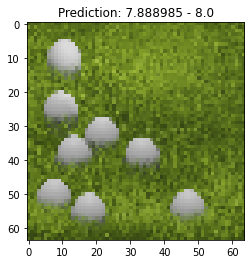

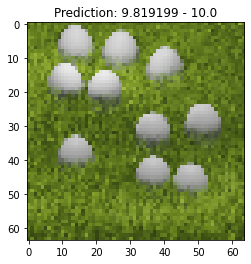

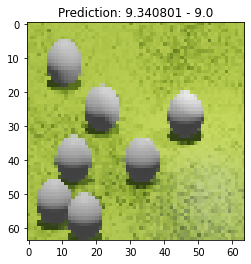

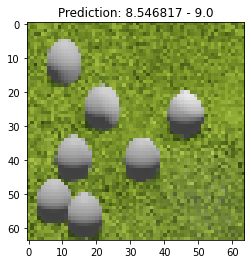

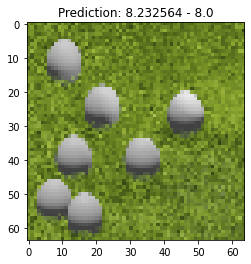

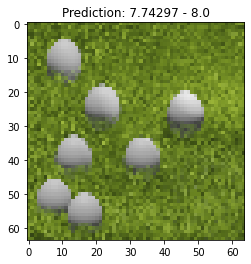

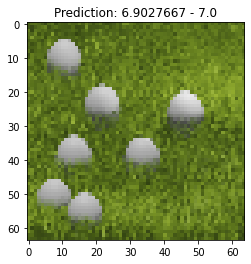

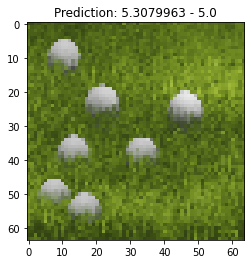

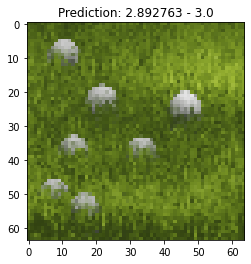

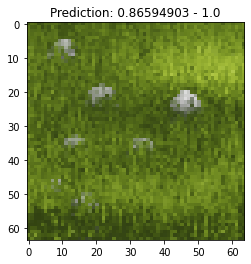

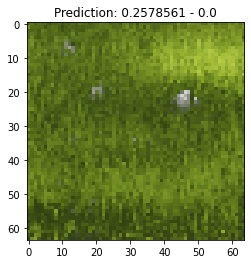

In [37]:
filepaths_unknown = [
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_8\\8\\0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_10\\10\\0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\0,0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\0,5.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\1,0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\1,5.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\2,0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\2,5.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\3,0.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\3,5.png',
    'C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_grasslength\\4,0.png'
    ]

for filepath_unknown in filepaths_unknown:

    # if class_mode == "categorical":
    #     img, prediction, predicted_class = make_prediction(filepath_unknown)

    #     plt.figure()
    #     plt.subplot(2,1,0+1)
    #     plt.imshow(img)
    #     plt.subplot(2,1,0+2)
    #     plt.plot(prediction,'og')
    #     plt.xlabel('Predicted "class"')
    #     plt.ylabel('Score')

    if class_mode == "sparse":
        img, prediction, predicted_class = make_prediction(filepath_unknown)

        plt.figure()
        plt.imshow(img)
        _ = plt.title('Prediction: '+str(prediction[0])+' - '+str(round(prediction[0])))

Found 2000 images belonging to 1 classes.
2000/2000 [==============================] - 6s 3ms/step
7.7483225 ± 0.18801975
Found 2000 images belonging to 1 classes.
2000/2000 [==============================] - 6s 3ms/step
9.597826 ± 0.2161062
Found 16000 images belonging to 8 classes.
16000/16000 [==============================] - 113s 7ms/step
4.529812 ± 2.7574744


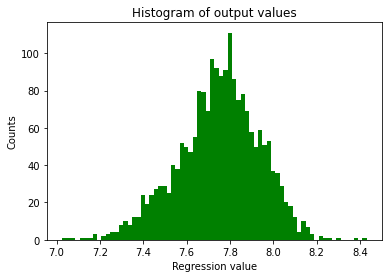

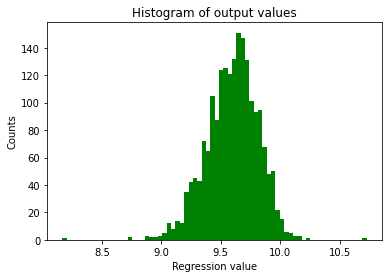

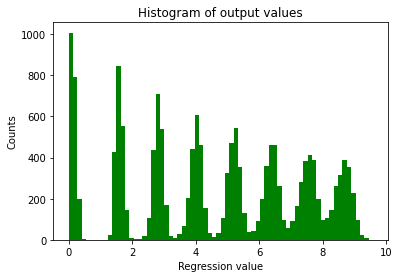

In [34]:
data_test_directories = [
    "C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_8",
    "C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_10",
    "C:\\Users\\Tobias\\Documents\\easter-egg-AI\\images_shortgrass"
    ]

for data_test_directory in data_test_directories:

    test_datagen = ImageDataGenerator(
        rescale=1.0/255.0
        )
    test_generator = test_datagen.flow_from_directory(
        data_test_directory,
        target_size=(input_shape[0],input_shape[1]),
        color_mode="rgb",
        class_mode=class_mode,
        batch_size=1,
        subset=None,
        shuffle=False
        )

    all_predictions = model.predict(test_generator, verbose=1)

    print(str(np.mean(all_predictions))+' ± '+str(np.std(all_predictions)))

    plt.figure()

    # if class_mode == 'categorical':
    #     _ = plt.imshow(all_predictions, cmap='summer', aspect='auto', interpolation='none')
    #     _ = plt.colorbar()
    #     _ = plt.xlabel('Predicted class')
    #     _ = plt.ylabel('Image number')
    #     _ = plt.title('Score heatmap')

    if class_mode == 'sparse':
        num_bins = 70
        _ = plt.hist(all_predictions, num_bins, color='g')
        _ = plt.xlabel('Regression value')
        _ = plt.ylabel('Counts')
        _ = plt.title('Histogram of output values')